In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import mlflow

In [2]:
df = pd.read_csv('Passenger_Satisfaction.csv',index_col=0)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
df.dropna(inplace=True)

In [4]:
df.isnull().sum()   

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [5]:
df['On-board service'].value_counts()

On-board service
4    30773
5    23584
3    22770
2    14632
1    11832
0        3
Name: count, dtype: int64

In [6]:
df['Gate location'].value_counts()

Gate location
3    28489
4    24353
2    19396
1    17511
5    13844
0        1
Name: count, dtype: int64

### Removing column with zero entries in survey as the range of the survey is always 1-5

In [7]:
df = df.loc[:, (df != 0).any(axis=0)]
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [8]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,64942.428625,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,37460.816597,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Handling categorical values

In [9]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,0
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,0


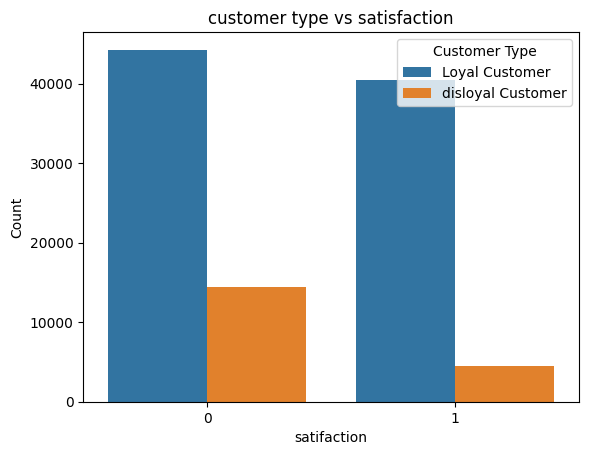

In [10]:
sns.countplot(x=df['satisfaction'], hue=df['Customer Type'], data=df)
plt.title('customer type vs satisfaction')
plt.xlabel('satifaction')
plt.ylabel('Count')
plt.show()

In [11]:
df=pd.get_dummies(columns=['Gender','Customer Type','Type of Travel'],data=df,drop_first=True,dtype=int)
df

,id,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,70172,13,Eco Plus,460,3,4,3,1,5,3,...,4,4,5,5,25,18.0,0,1,0,1
1,5047,25,Business,235,3,2,3,3,1,3,...,3,1,4,1,1,6.0,0,1,1,0
2,110028,26,Business,1142,2,2,2,2,5,5,...,4,4,4,5,0,0.0,1,0,0,0
3,24026,25,Business,562,2,5,5,5,2,2,...,3,1,4,2,11,9.0,0,0,0,0
4,119299,61,Business,214,3,3,3,3,4,5,...,4,3,3,3,0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,Eco,192,2,1,2,3,2,2,...,4,2,3,2,3,0.0,0,0,1,0
103900,73097,49,Business,2347,4,4,4,4,2,4,...,5,5,5,4,0,0.0,1,1,0,0
103901,68825,30,Business,1995,1,1,1,3,4,1,...,4,5,5,4,7,14.0,0,1,1,0
103902,54173,22,Eco,1000,1,1,1,5,1,1,...,1,5,4,1,0,0.0,0,0,1,0


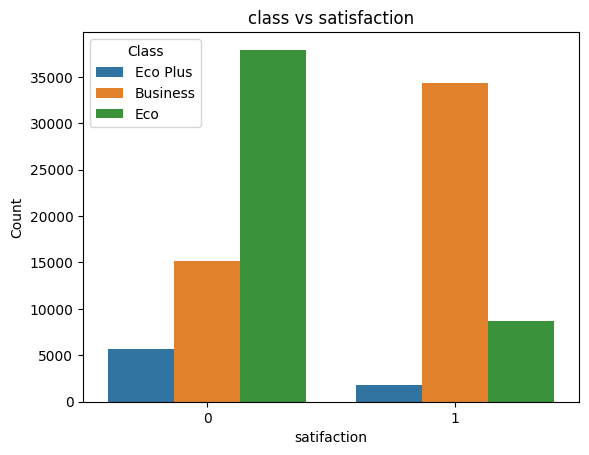

In [12]:
sns.countplot(x=df['satisfaction'], hue=df['Class'], data=df,)
plt.title('class vs satisfaction')
plt.xlabel('satifaction')
plt.ylabel('Count')
plt.show()

In [13]:
df['Class'] = df['Class'].map({'Eco':0,'Eco Plus':1,'Business':2}) # since the difference in class is ordinal, we can map it to numerical values to avoid importance of class
df.head() 

,id,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,70172,13,1,460,3,4,3,1,5,3,...,4,4,5,5,25,18.0,0,1,0,1
1,5047,25,2,235,3,2,3,3,1,3,...,3,1,4,1,1,6.0,0,1,1,0
2,110028,26,2,1142,2,2,2,2,5,5,...,4,4,4,5,0,0.0,1,0,0,0
3,24026,25,2,562,2,5,5,5,2,2,...,3,1,4,2,11,9.0,0,0,0,0
4,119299,61,2,214,3,3,3,3,4,5,...,4,3,3,3,0,0.0,1,1,0,0


In [14]:
df.drop(columns=['id'],inplace=True) #dropping id column as it is not making any sense in the dataset because it is just a unique identifier
df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,13,1,460,3,4,3,1,5,3,5,...,4,4,5,5,25,18.0,0,1,0,1
1,25,2,235,3,2,3,3,1,3,1,...,3,1,4,1,1,6.0,0,1,1,0
2,26,2,1142,2,2,2,2,5,5,5,...,4,4,4,5,0,0.0,1,0,0,0
3,25,2,562,2,5,5,5,2,2,2,...,3,1,4,2,11,9.0,0,0,0,0
4,61,2,214,3,3,3,3,4,5,5,...,4,3,3,3,0,0.0,1,1,0,0


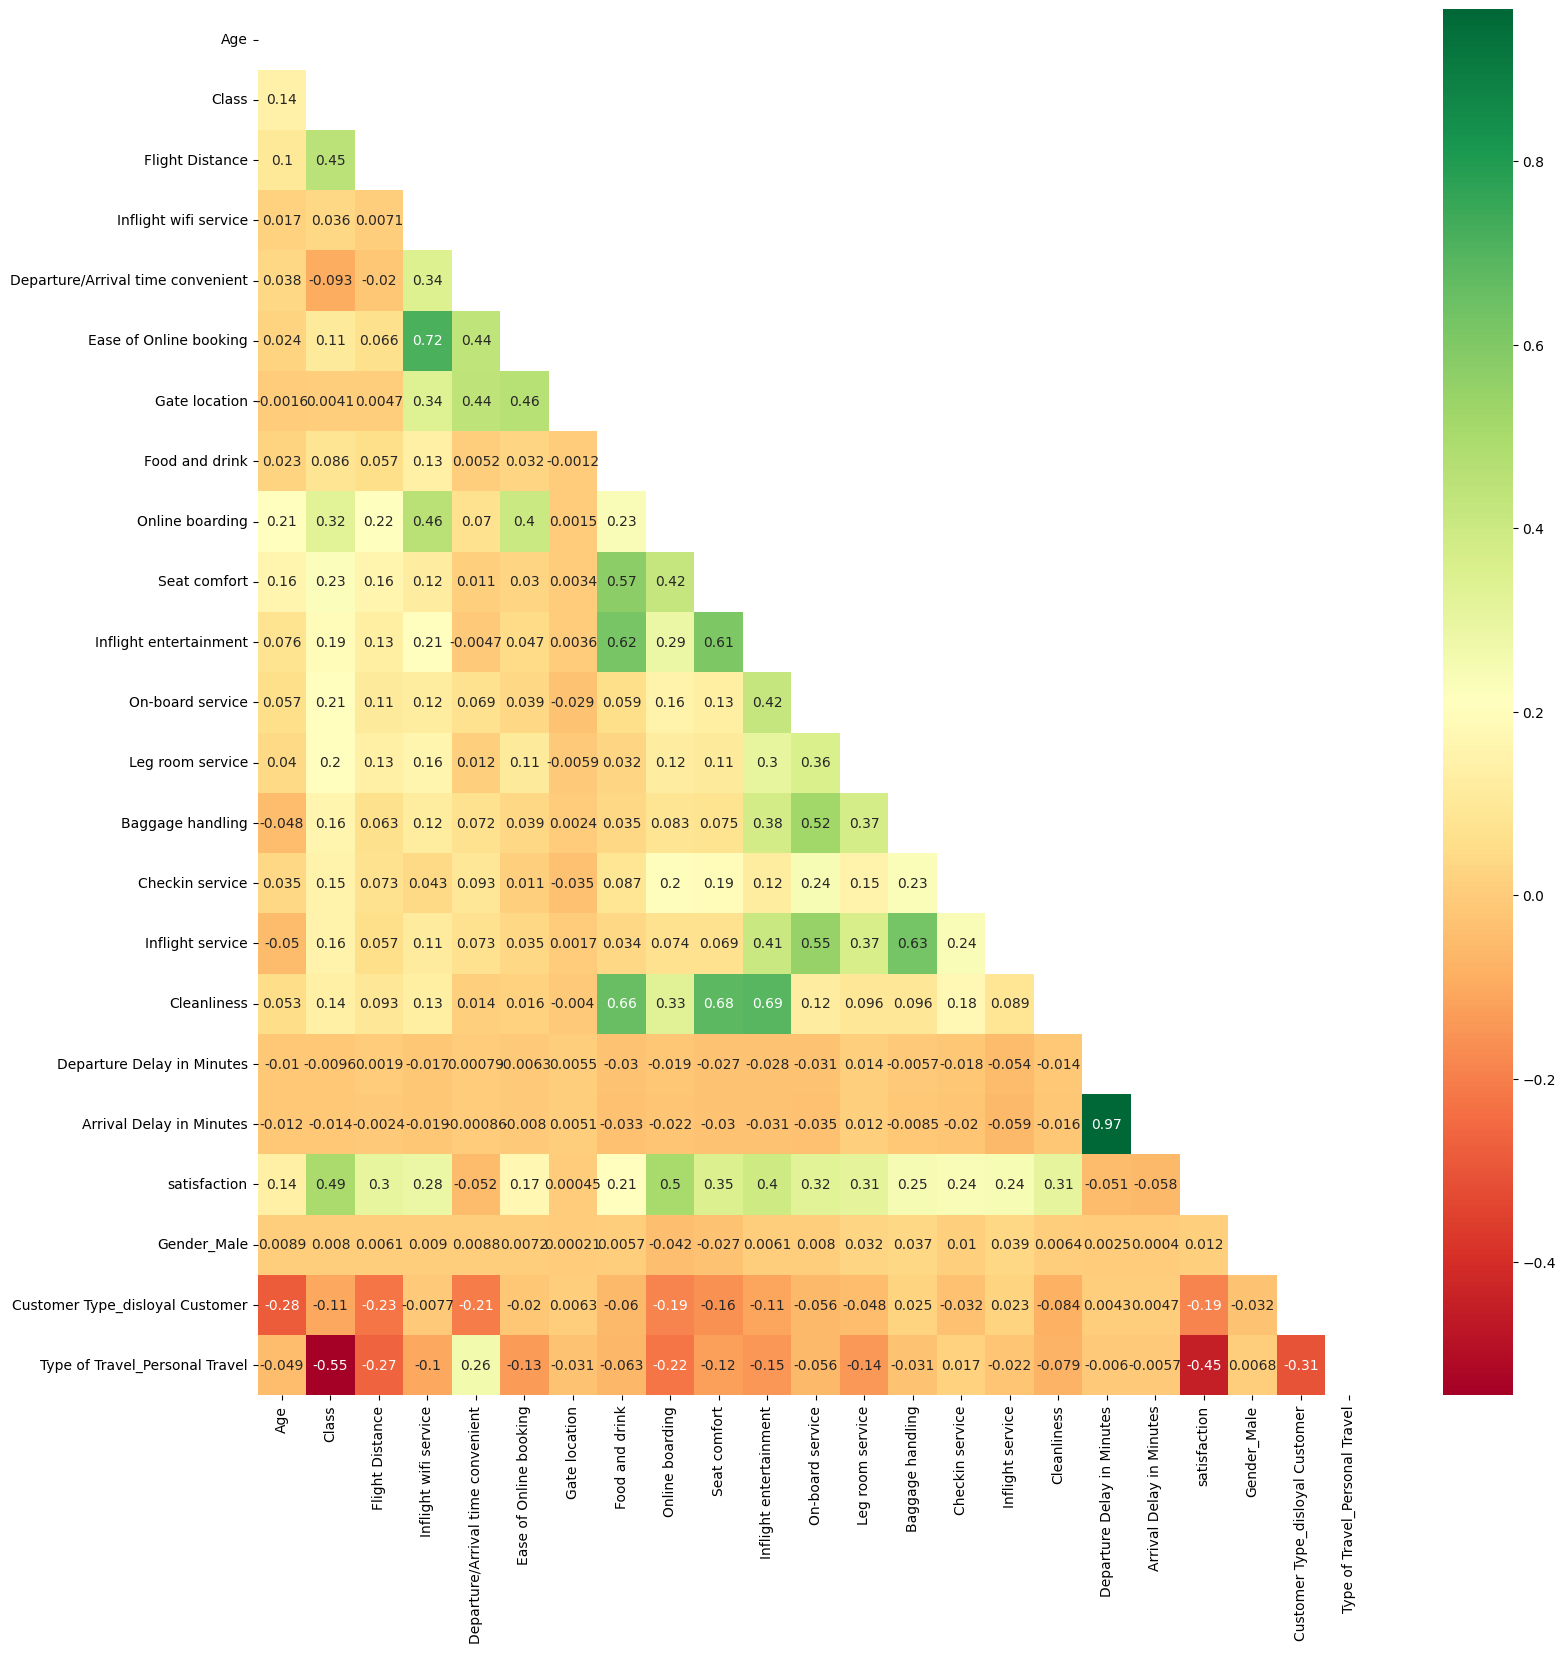

In [15]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True,cmap = "RdYlGn", mask= np.triu(df.corr()))

plt.show()

In [16]:
df.value_counts('satisfaction',normalize=True)

satisfaction
0    0.566606
1    0.433394
Name: proportion, dtype: float64

In [17]:
df

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,13,1,460,3,4,3,1,5,3,5,...,4,4,5,5,25,18.0,0,1,0,1
1,25,2,235,3,2,3,3,1,3,1,...,3,1,4,1,1,6.0,0,1,1,0
2,26,2,1142,2,2,2,2,5,5,5,...,4,4,4,5,0,0.0,1,0,0,0
3,25,2,562,2,5,5,5,2,2,2,...,3,1,4,2,11,9.0,0,0,0,0
4,61,2,214,3,3,3,3,4,5,5,...,4,3,3,3,0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,0,192,2,1,2,3,2,2,2,...,4,2,3,2,3,0.0,0,0,1,0
103900,49,2,2347,4,4,4,4,2,4,5,...,5,5,5,4,0,0.0,1,1,0,0
103901,30,2,1995,1,1,1,3,4,1,5,...,4,5,5,4,7,14.0,0,1,1,0
103902,22,0,1000,1,1,1,5,1,1,1,...,1,5,4,1,0,0.0,0,0,1,0


In [18]:
df.columns

Index(['Age', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel'],
      dtype='object')

In [19]:
X = df.drop(columns='satisfaction')
y = df['satisfaction']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
x_train.columns

Index(['Age', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel'],
      dtype='object')

2025/02/14 11:56:42 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_searc

LogisticRegression best params: {}
Accuracy: 0.8062165162411313
Precision: 0.8082422757800497
Recall: 0.8062165162411313
F1 Score: 0.8067110644765936
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82     11655
           1       0.76      0.81      0.78      9064

    accuracy                           0.81     20719
   macro avg       0.80      0.81      0.80     20719
weighted avg       0.81      0.81      0.81     20719



2025/02/14 11:56:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


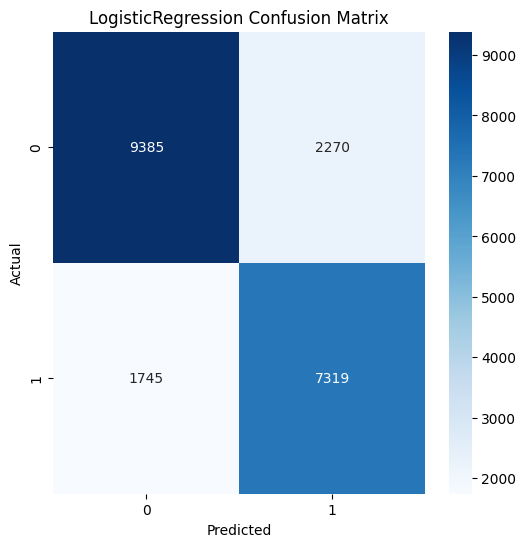

🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/403841464342790035/runs/6a4b4bfea85946869db7603abef42f2d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/403841464342790035


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 

KNeighbors best params: {'n_neighbors': 9}
Accuracy: 0.7550557459336841
Precision: 0.7546600196481299
Recall: 0.7550557459336841
F1 Score: 0.7526602658702681
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79     11655
           1       0.75      0.66      0.70      9064

    accuracy                           0.76     20719
   macro avg       0.75      0.74      0.75     20719
weighted avg       0.75      0.76      0.75     20719



2025/02/14 11:58:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


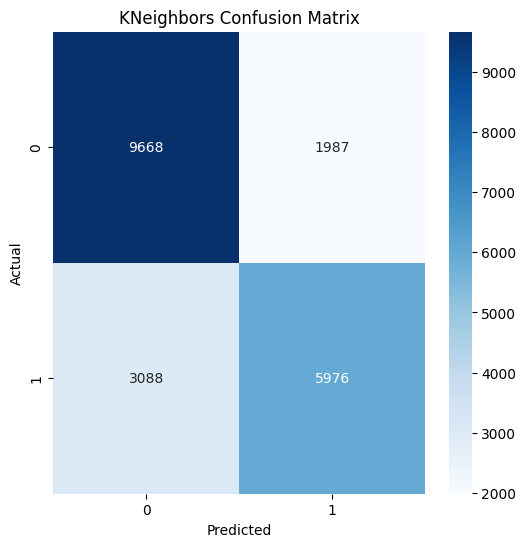

🏃 View run KNeighbors at: http://127.0.0.1:5000/#/experiments/403841464342790035/runs/14c5aa9caacd406ab4fa736bfbacd982
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/403841464342790035


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


DecisionTree best params: {'max_depth': 10}
Accuracy: 0.945798542400695
Precision: 0.9460345561649581
Recall: 0.945798542400695
F1 Score: 0.9456756267312907
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     11655
           1       0.95      0.92      0.94      9064

    accuracy                           0.95     20719
   macro avg       0.95      0.94      0.94     20719
weighted avg       0.95      0.95      0.95     20719



2025/02/14 11:58:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


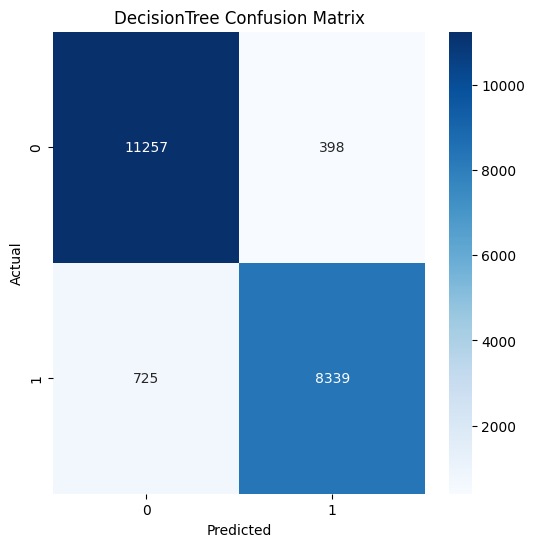

🏃 View run DecisionTree at: http://127.0.0.1:5000/#/experiments/403841464342790035/runs/418b8232ed7e4bc1847a36c414d6a0fa
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/403841464342790035


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomForest best params: {'n_estimators': 200, 'max_depth': 20}
Accuracy: 0.9620155412906028
Precision: 0.9622736981181458
Recall: 0.9620155412906028
F1 Score: 0.9619369855223091
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     11655
           1       0.97      0.94      0.96      9064

    accuracy                           0.96     20719
   macro avg       0.96      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



2025/02/14 12:02:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


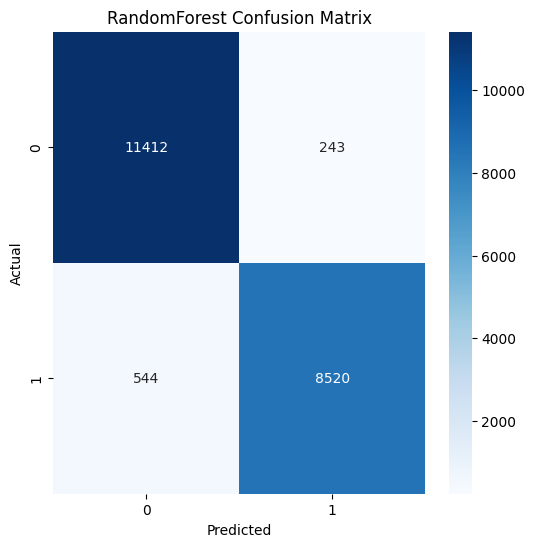

🏃 View run RandomForest at: http://127.0.0.1:5000/#/experiments/403841464342790035/runs/2f1580d6763341b28c7a99dd2c8ff9f9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/403841464342790035


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprec

AdaBoost best params: {'n_estimators': 200, 'learning_rate': 1.0}
Accuracy: 0.9309812249625947
Precision: 0.9309510489080336
Recall: 0.9309812249625947
F1 Score: 0.930908230993196
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     11655
           1       0.93      0.91      0.92      9064

    accuracy                           0.93     20719
   macro avg       0.93      0.93      0.93     20719
weighted avg       0.93      0.93      0.93     20719



2025/02/14 12:07:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


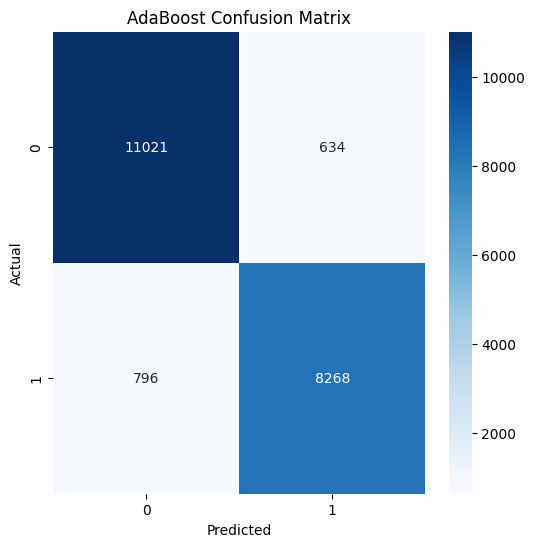

🏃 View run AdaBoost at: http://127.0.0.1:5000/#/experiments/403841464342790035/runs/88aff6a7196242d19a905a98ac8e4f80
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/403841464342790035


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Ridge best params: {'alpha': 10.0}
Accuracy: 0.8686712679183358
Precision: 0.8685762850916072
Recall: 0.8686712679183358
F1 Score: 0.8683049006965227
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89     11655
           1       0.87      0.83      0.85      9064

    accuracy                           0.87     20719
   macro avg       0.87      0.86      0.87     20719
weighted avg       0.87      0.87      0.87     20719



2025/02/14 12:07:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


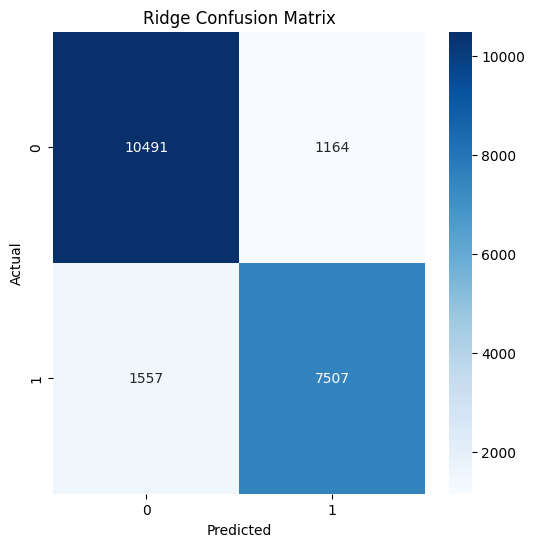

🏃 View run Ridge at: http://127.0.0.1:5000/#/experiments/403841464342790035/runs/59a4572e54764c058cb1b9d25bbc0d41
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/403841464342790035


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Lasso best params: {'C': 0.1}
Accuracy: 0.8718567498431391
Precision: 0.8718300958308932
Recall: 0.8718567498431391
F1 Score: 0.8714616118221046
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89     11655
           1       0.87      0.83      0.85      9064

    accuracy                           0.87     20719
   macro avg       0.87      0.87      0.87     20719
weighted avg       0.87      0.87      0.87     20719



2025/02/14 12:07:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


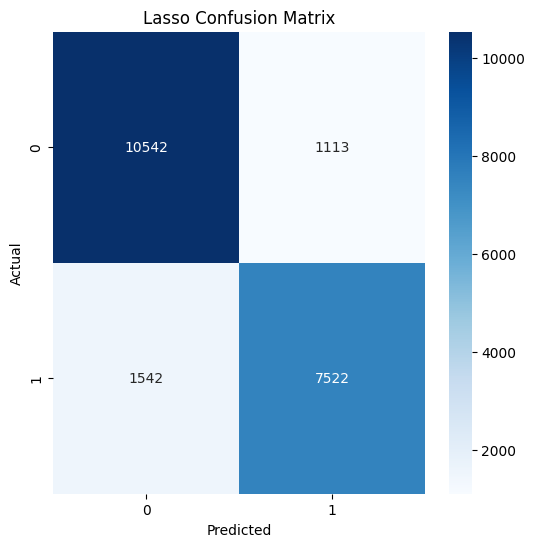

🏃 View run Lasso at: http://127.0.0.1:5000/#/experiments/403841464342790035/runs/9282a9a069584ba0b7e2e3bab2d792c6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/403841464342790035
XGBoost best params: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1}
Accuracy: 0.9639944012741928
Precision: 0.9643300629774906
Recall: 0.9639944012741928
F1 Score: 0.9639119121183459
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     11655
           1       0.98      0.94      0.96      9064

    accuracy                           0.96     20719
   macro avg       0.97      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:07:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2025/02/14 12:07:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


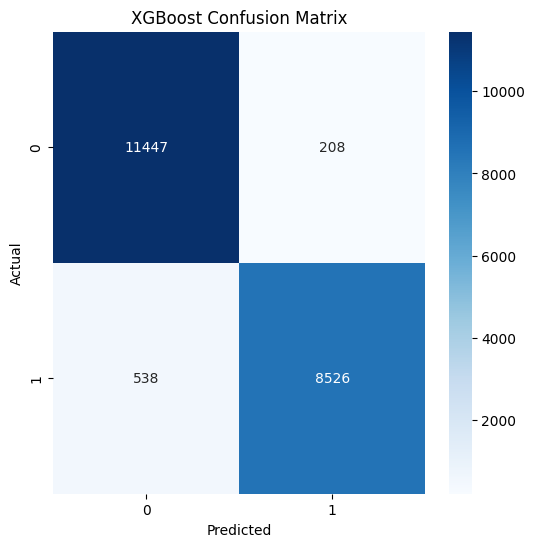

🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/403841464342790035/runs/074f00c0573446c4a2d41e28682df238
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/403841464342790035


In [ ]:
models = {
    'LogisticRegression': [LogisticRegression(), {}],
    'KNeighbors': [KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9]}],
    'DecisionTree': [DecisionTreeClassifier(), {'max_depth': [3, 5, 7, 10]}],
    'RandomForest': [RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}],
    'AdaBoost': [AdaBoostClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}],
    'Ridge': [RidgeClassifier(), {'alpha': [0.1, 1.0, 10.0]}],
    'Lasso': [LogisticRegression(penalty='l1', solver='liblinear'), {'C': [0.1, 1, 10]}],
    'XGBoost': [XGBClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}]
}

best_models = {}

mlflow.set_experiment("Classification_Experiment")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        random_search = RandomizedSearchCV(model[0], model[1], cv=5, scoring='accuracy', n_iter=10, random_state=40)
        random_search.fit(x_train, y_train)
        
        y_train_pred = random_search.best_estimator_.predict(x_train)
        y_pred = random_search.best_estimator_.predict(x_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        class_report = classification_report(y_test, y_pred)
        
        print(f"{model_name} best params: {random_search.best_params_}")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print("Classification Report:\n", class_report)
        
        best_models[model_name] = random_search.best_estimator_
        
        mlflow.log_params(random_search.best_params_)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        
        if model_name == 'XGBoost':
            mlflow.xgboost.log_model(random_search.best_estimator_, f"{model_name}_model")
        else:
            mlflow.sklearn.log_model(random_search.best_estimator_, f"{model_name}_model")
        
        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'{model_name} Confusion Matrix')
        plt.show()
